In [13]:

import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr
import pandas as pd
import requests
from tiingo import TiingoClient
api_key = 'a779ccd8ada3ec9e0d144f5f74fdf395b6be8bb2'


In [14]:
quotecurrency = ['btcusd', 'xrpusd', 'adausd', 'solusd']
start = "2020-1-1"
end="2021-7-1"

df= pdr.tiingo.TiingoDailyReader(quotecurrency, start=start, end=end, api_key=api_key)

all_data=df.read()
all_data



/usr/local/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close         high          low  \
symbol date                                                               
btcusd 2020-01-02 00:00:00+00:00  6963.684559  7208.283064  6923.563861   
       2020-01-03 00:00:00+00:00  7345.355821  7407.114205  6870.723993   
       2020-01-04 00:00:00+00:00  7354.871466  7404.769841  7273.229248   
       2020-01-05 00:00:00+00:00  7358.496281  7495.945072  7316.967452   
       2020-01-06 00:00:00+00:00  7759.080472  7795.994927  7347.414856   
...                                       ...          ...          ...   
solusd 2021-06-28 00:00:00+00:00    33.008488    34.306685    30.990627   
       2021-06-29 00:00:00+00:00    33.865112    35.838456    32.679439   
       2021-06-30 00:00:00+00:00    35.533617    35.988404    31.574142   
       2021-07-01 00:00:00+00:00    33.374894    35.580447    32.184349   
       2021-07-02 00:00:00+00:00    34.009536    34.114771    31.387885   

                                         open        volume     adjClose  \
symbol date                                                                
btcusd 2020-01-02 00:00:00+00:00  7196.346029  4.676001e+04  6963.684559   
       2020-01-03 00:00:00+00:00  6963.407320  9.208387e+04  7345.355821   
       2020-01-04 00:00:00+00:00  7346.201139  4.089401e+04  7354.871466   
       2020-01-05 00:00:00+00:00  7354.704328  5.108412e+04  7358.496281   
       2020-01-06 00:00:00+00:00  7357.753419  7.736858e+04  7759.080472   
...                                       ...           ...          ...   
solusd 2021-06-28 00:00:00+00:00    31.906324  1.450025e+06    33.008488   
       2021-06-29 00:00:00+00:00    33.020410  1.463808e+06    33.865112   
       2021-06-30 00:00:00+00:00    33.931914  1.832557e+06    35.533617   
       2021-07-01 00:00:00+00:00    35.555363  1.412034e+06    33.374894   
       2021-07-02 00:00:00+00:00    33.276194  1.331052e+06    34.009536   

                                      adjHigh       adjLow      adjOpen  \
symbol date                                                               
btcusd 2020-01-02 00:00:00+00:00  7208.283064  6923.563861  7196.346029   
       2020-01-03 00:00:00+00:00  7407.114205  6870.723993  6963.407320   
       2020-01-04 00:00:00+00:00  7404.769841  7273.229248  7346.201139   
       2020-01-05 00:00:00+00:00  7495.945072  7316.967452  7354.704328   
       2020-01-06 00:00:00+00:00  7795.994927  7347.414856  7357.753419   
...                                       ...          ...          ...   
solusd 2021-06-28 00:00:00+00:00    34.306685    30.990627    31.906324   
       2021-06-29 00:00:00+00:00    35.838456    32.679439    33.020410   
       2021-06-30 00:00:00+00:00    35.988404    31.574142    33.931914   
       2021-07-01 00:00:00+00:00    35.580447    32.184349    35.555363   
       2021-07-02 00:00:00+00:00    34.114771    31.387885    33.276194   

                                     adjVolume  divCash  splitFactor  
symbol date                                                           
btcusd 2020-01-02 00:00:00+00:00  4.676001e+04      0.0          1.0  
       2020-01-03 00:00:00+00:00  9.208387e+04      0.0          1.0  
       2020-01-04 00:00:00+00:00  4.089401e+04      0.0          1.0  
       2020-01-05 00:00:00+00:00  5.108412e+04      0.0          1.0  
       2020-01-06 00:00:00+00:00  7.736858e+04      0.0          1.0  
...                                        ...      ...          ...  
solusd 2021-06-28 00:00:00+00:00  1.450025e+06      0.0          1.0  
       2021-06-29 00:00:00+00:00  1.463808e+06      0.0          1.0  
       2021-06-30 00:00:00+00:00  1.832557e+06      0.0          1.0  
       2021-07-01 00:00:00+00:00  1.412034e+06      0.0          1.0  
       2021-07-02 00:00:00+00:00  1.331052e+06      0.0          1.0  

[1918 rows x 12 columns]

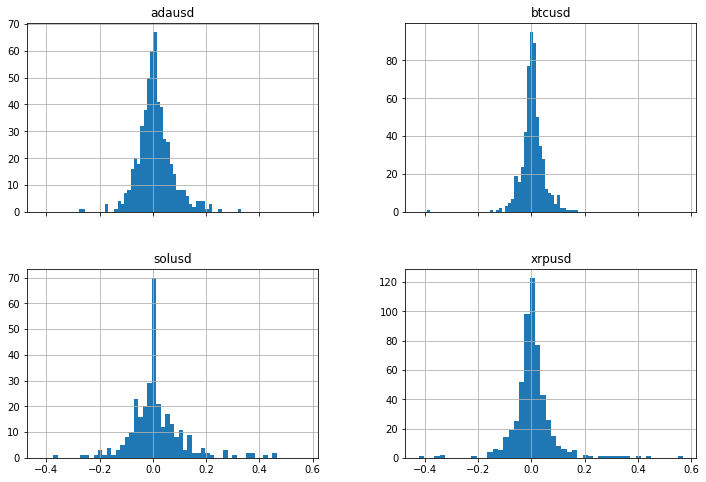

In [15]:


# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[["adjClose"]].reset_index().pivot('date', 'symbol', 'adjClose')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [16]:
#An API was used as a uniue identifier that is used across programming interfaces.
#sending different types of responses from the calls of the API.